NN Project - Part B

PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

Part B - Q1 A - Read the .h5 file and assign to a variable.

An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. Here, groups work like dictionaries, and datasets work like NumPy arrays

In [1]:
!pip show tensorflow  # Command to view detailed information about the installed TensorFlow package
!pip show keras       # Command to view detailed information about the installed Keras package

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [2]:
pip install h5py

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read the .h5 file and assign to a variable.
import h5py
f = h5py.File('/content/drive/MyDrive/Neural NW and Deep Lrng/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

Part B - Q1 B - Print all the keys from the .h5 file.

In [6]:
# Print all the keys from the .h5 file.
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

Based on our observation, there are 6 datasets namely 'X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val' in the given file.

Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test

In [7]:
X_test, X_train, X_val = f['X_test'], f['X_train'], f['X_val']
y_test, y_train, y_val = f['y_test'], f['y_train'], f['y_val']

Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [8]:
print("Shape of X_train is :", X_train.shape)
print("Shape of y_train is :", y_train.shape)
print("Shape of X_test is :", X_test.shape)
print("Shape of y_test is :", y_test.shape)

Shape of X_train is : (42000, 32, 32)
Shape of y_train is : (42000,)
Shape of X_test is : (18000, 32, 32)
Shape of y_test is : (18000,)


The x and y datasets are in synch.

In [9]:
print("Shape of X_val is :", X_val.shape)
print("Shape of y_val is :", y_val.shape)

Shape of X_val is : (60000, 32, 32)
Shape of y_val is : (60000,)


Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.

In [10]:
import matplotlib.pyplot as plt         # Provides an implicit, MATLAB-like, way of plotting

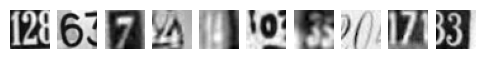

The corresponding labels of the first 10 images in the train data are : 
2
6
7
4
4
0
3
0
7
3


In [11]:
# Visualise first 10 images in train data
plt.figure(figsize=(6, 5))              # Sets the figure size to accommodate the 10 images
for i in range(10):                     # Loop iterates over the first 10 images
    plt.subplot(1, 10, i + 1)           # Creates a subplot layout with 1 row, 10 columns, and places the current image in the appropriate subplot
    plt.imshow(X_train[i], cmap='gray') # Displays the image at the current index using the grayscale colormap
                                        # cmap is a colormap instance
    plt.axis('off')                     # Hides the axes labels and ticks
plt.show()                              # Displays the figure with all the subplots

# Print the corresponding labels of the 10 images
print("The corresponding labels of the first 10 images in the train data are : ")

# Loop through the first 10 elements of y_train and print each label
for i in range(10):
    print(y_train[i])

Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [12]:
import numpy as np                     # Used for scientific computing in python

In [13]:
# Reshape all the images in the dataset
# Reshaping helps to organise an image in the way that would help to feed the data to the model's algorithm
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 1)) # Specifies the desired shape for the X_training data array
X_test = np.reshape(X_test, (X_test.shape[0], 32, 32, 1))    # Specifies the desired shape for the X_testing data array

print("After reshaping, the updated shapes are : ")
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test  : ", X_test.shape)

After reshaping, the updated shapes are : 
Shape of X_train :  (42000, 32, 32, 1)
Shape of X_test  :  (18000, 32, 32, 1)


Reshapes the training and test data arrays to have the desired format for a convolutional neural network (CNN).


CNNs require input data to have a specific format, typically a 4-dimensional array where the dimensions represent the following:

Batch size: The number of samples in the input data.

Height: The height of each image.

Width: The width of each image.

Channels: The number of channels in each image (e.g., 1 for grayscale, 3 for RGB).

By reshaping the training and test data arrays using np.reshape(), the code snippet ensures that the data is in the correct format for the CNN model.

Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [14]:
# Normalise the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

The pixel values can range from 0 to 256. Each number represents a color code.
When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
To reduce this, we can normalize the values to range from 0 to 1.
In this way, the numbers will be small and the computation becomes easier and faster.
As the pixel values range from 0 to 256, apart from 0 the range is 255. So, dividing all the values by 255 will convert it to range from 0 to 1.

Part B - Q2 E - Transform Labels into format acceptable by Neural Network

In [15]:
from keras.utils import to_categorical

In [16]:
# Transform Labels into format acceptable by Neural Network, hence using to_categorical function
# Define the number of output classes
num_classes = 10

# Convert class labels to one-hot encoded format
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Update the variables
y_train = y_train_onehot
y_test = y_test_onehot

Here, num_classes = 10 stands for the digits from 0 to 9.

to_categorical function - Converts a class vector (integers) to binary class matrix.
E.g. for use with categorical_crossentropy . x: Array-like with class values to be converted into a matrix (integers from 0 to num_classes - 1 ).

Neural networks typically require class labels to be in a one-hot encoded format. This means that each class label is represented by a vector of zeros, except for the index corresponding to the class label, which is set to 1.

For example, if a sample belongs to class 3, its one-hot encoded label would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

By using the to_categorical() function, the code snippet ensures that the class labels in y_train and y_test are in the correct format for the neural network model.

Part B - Q2 F - Print total Number of classes in the Dataset.

In [17]:
from numpy import array                        # Numpy is a general-purpose array-processing package

In [18]:
# Print total Number of classes in the Dataset
nbr_class = len(set(tuple(y) for y in y_train))
nbr_class = len(np.unique(y_train))
print("The total number of classes in the dataset are ", nbr_class)

The total number of classes in the dataset are  2


Part B - Q3 A - Design a Neural Network to train a classifier.

In [19]:
!python -m pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [20]:
import keras
from keras import layers

In [21]:
from tensorflow import keras
from keras.layers import Dense, Flatten

In [22]:
import tensorflow as tf

In [23]:
tf.keras.backend.clear_session()

In [24]:
# Defining the neural network model
model2 = keras.Sequential()    # Sequential groups a linear stack of layers into a Model.

The sequential model allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other.
Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.


In [25]:
# Adds input, 2 hidden and output layers
model2.add(keras.layers.Flatten(input_shape=(32, 32)))               # Adds the input layer
model2.add(keras.layers.Dense(128, activation='relu'))               # Adds 1st hidden layer
model2.add(keras.layers.Dense(64, activation='relu'))                # Adds 2nd hidden layer
model2.add(keras.layers.Dense(num_classes, activation='softmax'))    # Adds output layer, activation function used is softmax here

The Dense is used to specify the fully connected layer.
Here, it is a multiclass classification, hence softmax is used.

In [26]:
# Model compilation
model2.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [27]:
# Model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 140106 (547.29 KB)
Trainable params: 140106 (547.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

A classifier, or classification model, predicts categorical labels (classes).

In [28]:
print(type(model2.loss))

<class 'str'>


In [29]:
import tensorflow as tf
tf.keras.backend.clear_session()

A tf.function that you define (for example by applying the @tf.function decorator) is just like a core TensorFlow operation.

Calling clear_session() releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.

In [30]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [31]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
model2_classifier = model2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/50
657/657 [==============================] - 5s 6ms/step - loss: 2.2630 - accuracy: 0.1427 - val_loss: 2.0827 - val_accuracy: 0.2351
Epoch 2/50
657/657 [==============================] - 9s 13ms/step - loss: 1.6947 - accuracy: 0.4316 - val_loss: 1.5133 - val_accuracy: 0.5017
Epoch 3/50
657/657 [==============================] - 7s 11ms/step - loss: 1.3666 - accuracy: 0.5606 - val_loss: 1.2959 - val_accuracy: 0.5920
Epoch 4/50
657/657 [==============================] - 9s 13ms/step - loss: 1.2417 - accuracy: 0.6084 - val_loss: 1.2112 - val_accuracy: 0.6195
Epoch 5/50
657/657 [==============================] - 7s 10ms/step - loss: 1.1660 - accuracy: 0.6394 - val_loss: 1.1283 - val_accuracy: 0.6537
Epoch 6/50
657/657 [==============================] - 8s 12ms/step - loss: 1.1252 - accuracy: 0.6522 - val_loss: 1.1182 - val_accuracy: 0.6541
Epoch 7/50
657/657 [==============================] - 4s 7ms/step - loss: 1.0836 - accuracy: 0.6634 - val_loss: 1.0812 - val_accuracy: 0.6721
E

Part B - Q3 C - Evaluate performance of the model with appropriate metrics.

Performance evaluation is the quantitative measure of how well a trained model performs on specific model evaluation metrics in machine learning. This information can then be used to determine, if a model is ready to move onto the next stage of testing, be deployed more broadly, or is in need of more training or retraining.

Classification metrics are generally used for discrete values a model might produce, when it has finished classifying all the given data. In order to clearly display the raw data needed to calculate desired classification metrics, a confusion matrix for a model can be created.

In [33]:
y_predict=model2.predict(X_test)

563/563 [==============================] - 1s 2ms/step


model. predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model. predict(X_new) ), and returns the learned label for each object in the array.

In [34]:
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [35]:
# Convert y_test to integer labels
y_test_intgr = np.argmax(y_test, axis=1)

The argmax() function is a built-in function in Python that returns the maximum value index in an iterable. It can be used with lists, tuples, or other iterable objects.

In [36]:
print(y_test_intgr)

[1 7 2 ... 7 9 2]


In [37]:
# Convert predictions(y_predict)  to class labels
y_predict_classes = np.argmax(y_predict, axis=1)

In [38]:
print(y_predict_classes)

[0 7 2 ... 7 9 2]


We would need to see the performance of the model, hence a classification report has to be generated.

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test_intgr, y_predict_classes))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1814
           1       0.75      0.82      0.78      1828
           2       0.80      0.78      0.79      1803
           3       0.77      0.73      0.75      1719
           4       0.85      0.80      0.83      1812
           5       0.75      0.79      0.77      1768
           6       0.82      0.74      0.78      1832
           7       0.76      0.82      0.79      1808
           8       0.76      0.71      0.74      1812
           9       0.78      0.74      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



The classification report visualizer displays the precision, recall, F1, and support scores for the model.

There are four ways to check, if the predictions are right or wrong:

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive

Precision — What percent of your predictions were correct?

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures, as they embed precision and recall into their computation. The weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Support

Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process.

In [41]:
from sklearn.metrics import confusion_matrix

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [42]:
# Investigate the existence of these variables
print(y_test_intgr)
print(y_predict_classes)

[1 7 2 ... 7 9 2]
[0 7 2 ... 7 9 2]


In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Confusion matrix calculation
cm = confusion_matrix(y_test_intgr, y_predict_classes)
print(cm)

[[1535   43   17   25   29   13   37   37   25   53]
 [  52 1495   18   37   54   12   20   87   29   24]
 [  30   37 1398   48   25   21   11  146   34   53]
 [  28   64   61 1249   22  134   20   70   41   30]
 [  58   85   35   22 1458   21   50   14   26   43]
 [  33   34   26   95   20 1391   60   16   45   48]
 [ 102   34   17   19   48   87 1361   24  119   21]
 [  31   68   90   26   12   20   15 1489   25   32]
 [  53   67   44   51   24   91   85   29 1293   75]
 [  91   62   41   59   28   71    8   53   57 1334]]


The confusion matrix shows the number of correct and incorrect predictions for each class.

The diagonal elements of the matrix represent the number of correctly classified samples for each class.

The off-diagonal elements represent the number of misclassified samples.


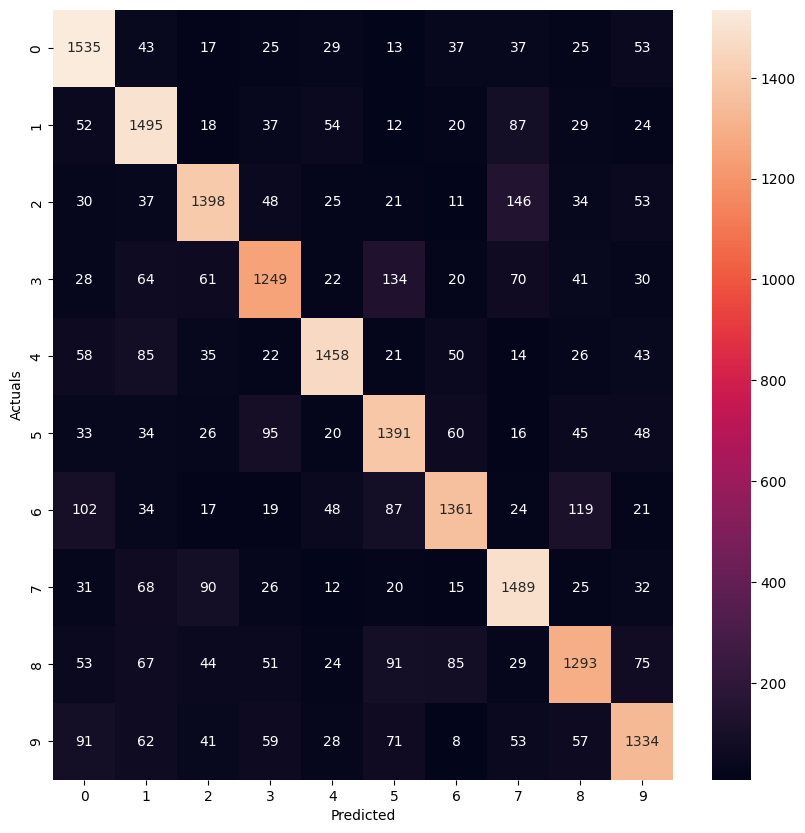

In [45]:
# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')  # fmt defines the format of the colours.
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [46]:
!pip install matplotlib

In [47]:
import matplotlib.pyplot as plt

In [48]:
# Load the history object from the global variables
model2_classifier = globals()["model2_classifier"]

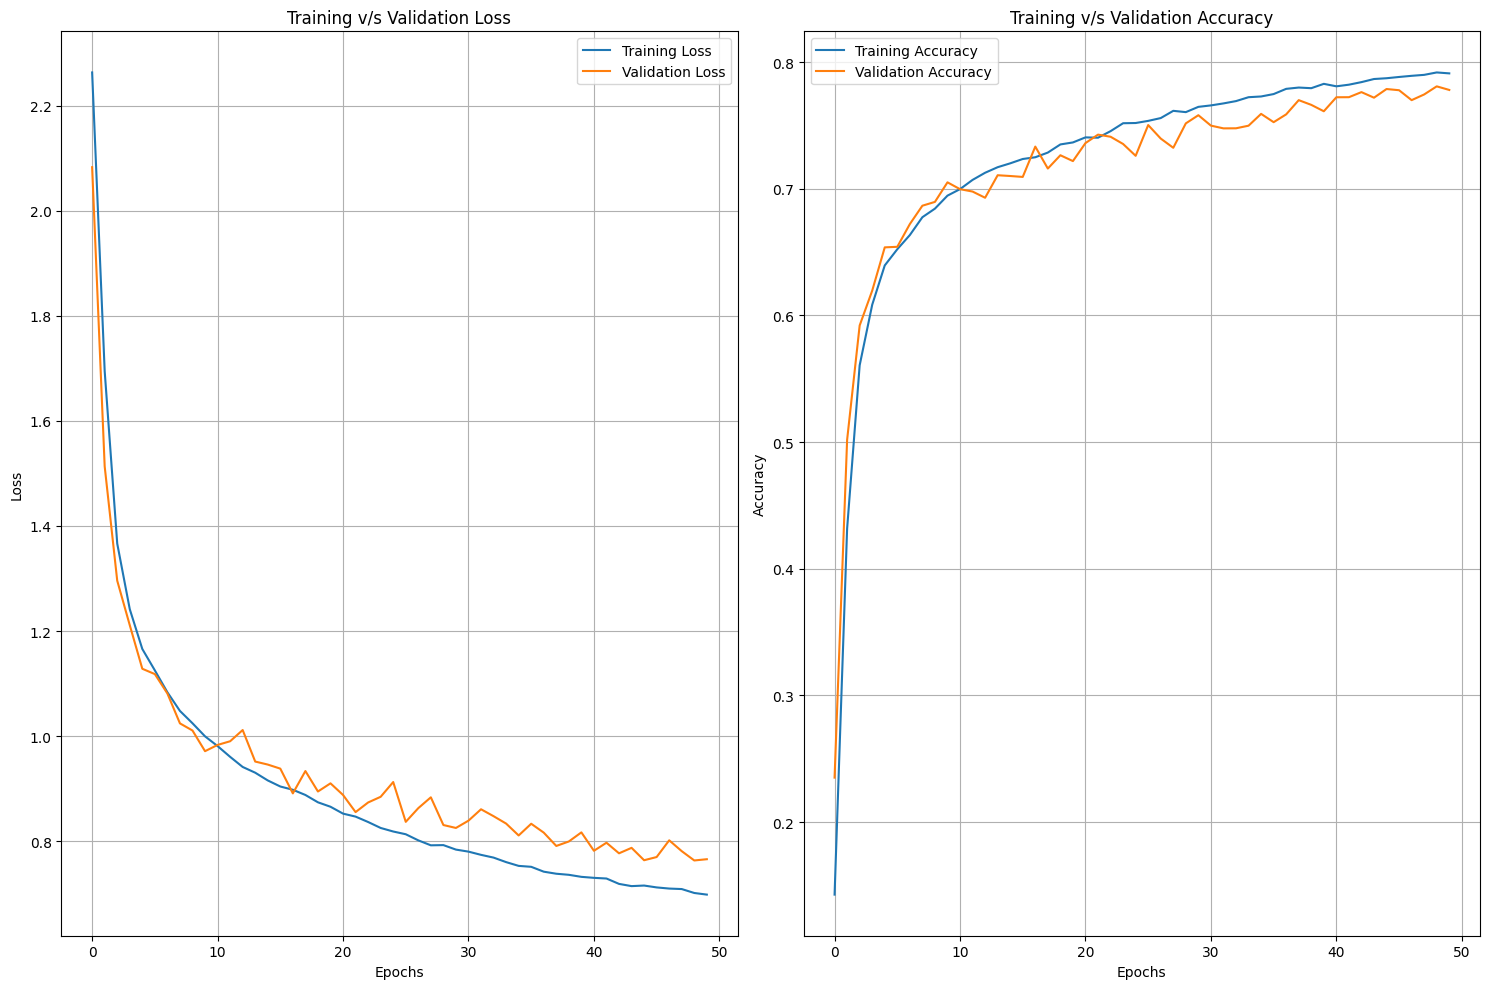

In [49]:
plt.figure(figsize=(15, 10))

# Plots training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(model2_classifier.history['loss'], label='Training Loss')
plt.plot(model2_classifier.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plots training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model2_classifier.history['accuracy'], label='Training Accuracy')
plt.plot(model2_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Training and Validation Loss:

a. In the early epochs, there was a large initial drop in both training and validation loss, suggesting that the model was learning and generalizing effectively.

b. Up until about epoch 20, there is a steady declining trend in both training and validation loss.

c. Following epoch 20, there appears to be some fluctuation in the validation loss, but the training loss keeps decreasing, suggesting that the model may be overfitting since it is fitting the training data too closely.

Training and Validation Accuracy:

a. At epoch 50, the training accuracy had risen steadily to around 79%.

b. Validation accuracy also rose, but it seemed to reach a plateau at 73–74% around epoch 20, indicating that the model's performance may not have improved much after this.

Overfitting:

The training accuracy increased but the validation accuracy plateaued or showed minimal progress at a particular epoch, which is a blatant sign of overfitting.

The validation loss fluctuated or stagnated while the training loss kept declining, suggesting a lack of generalization on untested data.